In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# 1.Project Description:

This kaggle project involves classifying the tweets as disaster(1) or non disaster(0).A total of 10,000 tweets has to be identified.Basic Exploratory data analysis is done to find the text and token length in each of these tweets, printing word clouds etc. After data preprocessiong,Data is trained on different models to find the best F1 score and hyperparameter tuning is done.The model is trained on the best F1 score model and submitted to find the accuracy score.

The model has approximately ~10k tweets and keyword and location column has missing values.

Step 1: Data Loading

**Step 2: Exploratory Data Analysis** 
a)Checking for Null Vallues
b)Check Class Imbalance
c)Text Length Analysis
d)Tweet Length Distribution
e)Word Cloud
f)Token lenth distribution by class

**Step 3:Data Preprocessing**
a)Text Normalization - Changing to lowercase,remove URLs,hastags,punctuations rtc.
b)Tokenization

**Step 4:Model Building and Training**
a)Train/Validation Split
b)TF-IDF Vectorization
c)Logistic Regression
d)Linear SVM (Printing their classification report and evaluation metric)
e)Tokenization and Padding (Preprocessing)
f)LSTM
g)GRU
h)Bidirectional LSTM (Printing the validation loss and acccuracy for 5 epochs for each of the 3 models)

**Step 5: Hyperparameter Tuning** - Data is trained on different models and their F1 score is calculated

Hyperparameter Optimization Summary
F1 Scores Summary
Classification Reports for all the models

**Step 6:Submissions**


In [ ]:
#Import the librararies

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional
from sklearn.metrics import f1_score,classification_report



# 2.Load the Data

In [37]:
#Load the training and test data

filepath = "/kaggle/input/nlp-getting-started/"
train_path = os.path.join(filepath,'train.csv')
test_path = os.path.join(filepath,'test.csv')

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# 3.Exploratory Data Analysis

In [38]:
#Exploratory data analysis

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [39]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [40]:
#Exploratory Data Analysis

#Total rows and columns
print('Trainig Data Set Shape:',train_df.shape)
print('Testing Data Set Shape:',test_df.shape)

Trainig Data Set Shape: (7613, 5)
Testing Data Set Shape: (3263, 4)


In [41]:
#Column Names

print(train_df.columns.to_list())
print(test_df.columns.to_list())

['id', 'keyword', 'location', 'text', 'target']
['id', 'keyword', 'location', 'text']


In [42]:
#Check Null values

print(train_df.isnull().sum())

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


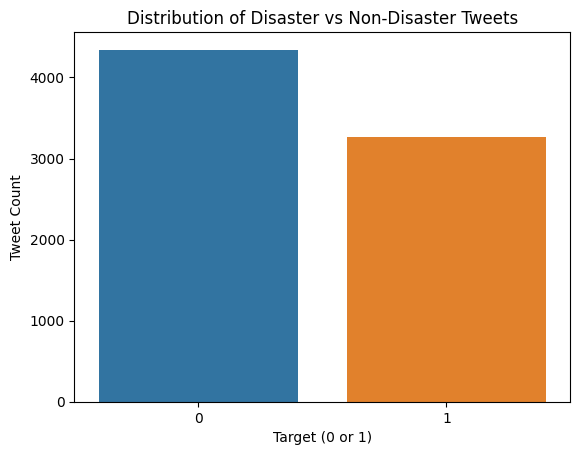

In [43]:
#Check for class imbalance
#Plot the distribution of target column(0 - Not diaster, 1 - Disaster)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target',data=train_df)
plt.title('Distribution of Disaster vs Non-Disaster Tweets')
plt.xlabel('Target (0 or 1)')
plt.ylabel('Tweet Count')
plt.show()

From the above plot we can conclude that there is imbalance in the dataset.Non disaster tweets are more than the disaster tweets.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

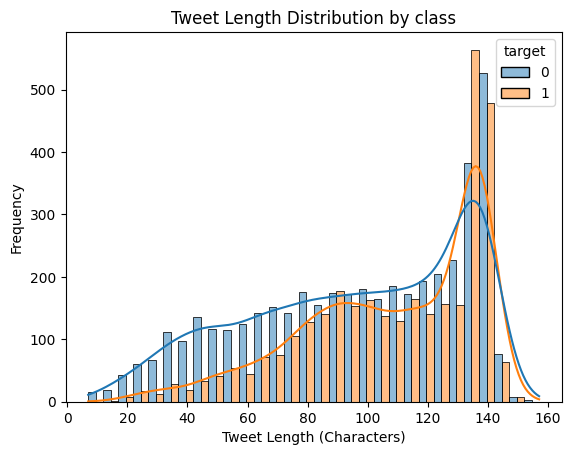

In [44]:
#Text Length Analysis

train_df['text_len'] = train_df['text'].apply(len)

sns.histplot(data=train_df,x='text_len',hue='target',bins=30,kde=True,multiple='dodge')
plt.title('Tweet Length Distribution by class')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')
plt.show()

From the above graph, we can conclude that disaster tweets have more character lengths mainly because it includes some additional details like location,time,severity etc.

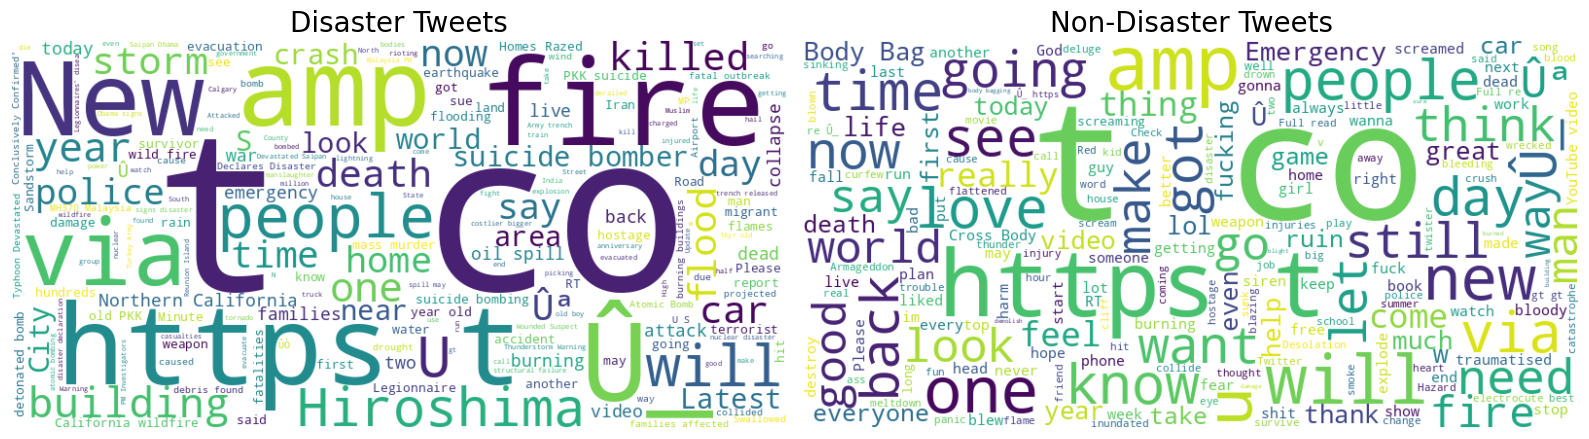

In [45]:
#Generate WordClouds for Disaster vs Non-Disaster Tweets

from wordcloud import WordCloud

disaster_tweets = "".join(train_df[train_df['target']==1]['text'].dropna())
non_disaster_tweets = "".join(train_df[train_df['target']==0]['text'].dropna())

wordcloud_disaster = WordCloud(width = 800,height = 400,background_color='white').generate(disaster_tweets)
wordcloud_nondisaster = WordCloud(width = 800,height = 400,background_color='white').generate(non_disaster_tweets)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title("Disaster Tweets", fontsize=20)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_nondisaster, interpolation='bilinear')
plt.title("Non-Disaster Tweets", fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr

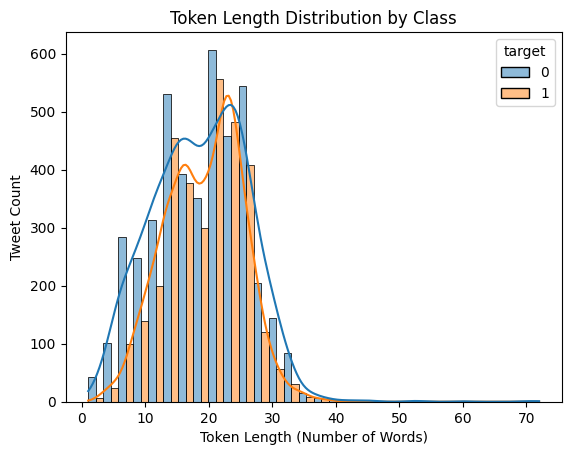

In [46]:
#Determine the Token length

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

train_df['token_len'] = train_df['text'].apply(lambda x:len(word_tokenize(str(x))))

sns.histplot(data=train_df, x='token_len', hue='target', bins=30, kde=True,multiple='dodge')
plt.title("Token Length Distribution by Class")
plt.xlabel("Token Length (Number of Words)")
plt.ylabel("Tweet Count")
plt.show()


From the graph, we can see that most of the tweet shave 10 to 25 tokens.Few tweets exceed 40 tokens.

# 4.Data Preprocessing

In [47]:
#Data Preprocessing
#Text Normalization

import re

def clean_text(text):
    text = str(text).lower() #change to lowercase
    text =re.sub(r"http\S+", "", text) #remove URLs
    text =re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)  #remove hashtags
    text = re.sub(r"[^\w\s]", "", text) #remove punctuations
    text = re.sub(r"\d+", "", text) #numbers

    return text

train_df['cleaned_text'] = train_df['text'].apply(clean_text)

In [48]:
#Tokenization
#Cleaned data for training dataset 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


train_df['cleaned_text'] = train_df['text'].fillna("").apply(clean_text)
train_df['cleaned_text'] = train_df['cleaned_text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
train_df['cleaned_text'] = train_df['cleaned_text'].apply(lambda x: [word for word in x if word not in stop_words])

train_df['cleaned_text_str'] = train_df['cleaned_text'].apply(lambda x: " ".join(x))


kw_clean = train_df["keyword"].fillna("").apply(clean_text)
loc_clean = train_df["location"].fillna("").apply(clean_text)


train_df['final_text'] = kw_clean + " " + loc_clean + " " + train_df['cleaned_text_str']
train_df['final_text'] = train_df['final_text'].str.strip()

In [49]:
train_df[["text", "final_text"]].head(10)

,text,final_text
0,Our Deeds are the Reason of this #earthquake M...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfires pou...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy closed directi...
6,#flood #disaster Heavy rain causes flash flood...,flood disaster heavy rain causes flash floodin...
7,I'm on top of the hill and I can see a fire in...,im top hill see fire woods
8,There's an emergency evacuation happening now ...,theres emergency evacuation happening building...
9,I'm afraid that the tornado is coming to our a...,im afraid tornado coming area


In [50]:
#Cleaning data for Testdataset

test_df['cleaned_text'] = test_df['text'].fillna("").apply(clean_text)
test_df['cleaned_text'] = test_df['cleaned_text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
test_df['cleaned_text'] = test_df['cleaned_text'].apply(lambda x: [word for word in x if word not in stop_words])

test_df['cleaned_text_str'] = test_df['cleaned_text'].apply(lambda x: " ".join(x))


kw_clean = test_df["keyword"].fillna("").apply(clean_text)
loc_clean = test_df["location"].fillna("").apply(clean_text)


test_df['final_text'] = kw_clean + " " + loc_clean + " " + test_df['cleaned_text_str']
test_df['final_text'] = test_df['final_text'].str.strip()

In [51]:
test_df[["text", "final_text"]].head(10)

,text,final_text
0,Just happened a terrible car crash,happened terrible car crash
1,"Heard about #earthquake is different cities, s...",heard earthquake different cities stay safe ev...
2,"there is a forest fire at spot pond, geese are...",forest fire spot pond geese fleeing across str...
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills china taiwan
5,We're shaking...It's an earthquake,shakingits earthquake
6,They'd probably still show more life than Arse...,theyd probably still show life arsenal yesterd...
7,Hey! How are you?,hey
8,What a nice hat?,nice hat
9,Fuck off!,fuck


# 5.Model Building & Training

In [53]:
#TF-IDF

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, classification_report

# Train/Validation Split
X_train_text, X_val_text, y_train, y_val = train_test_split(
    train_df['final_text'], train_df['target'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization - Converting words to numbers for processing
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_features=100000)
X_train = tfidf.fit_transform(X_train_text)
X_val = tfidf.transform(X_val_text)

#Logistic Regression & F1 score
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
f1_logreg = f1_score(y_val, y_pred_logreg)
print("Logistic Regression F1 Score:", f1_logreg)
print(classification_report(y_val, y_pred_logreg))

#Linear SVM/F1 Score/Classification Report
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
f1_svm = f1_score(y_val, y_pred_svm)
print("Linear SVM F1 Score:", f1_svm)
print(classification_report(y_val, y_pred_svm))




Logistic Regression F1 Score: 0.7426710097719871
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       874
           1       0.79      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

Linear SVM F1 Score: 0.7322404371584701
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       874
           1       0.74      0.72      0.73       649

    accuracy                           0.77      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.77      0.77      0.77      1523



Logistic Regression's F1 score is slightly better than Linear SVM.

In [54]:
#Preprocessing : Tokenization and Padding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize - Convert text to integers
#Padding - all vectors has to be equal.Longers tweets will be truncated and
#smaller tweets will be padded with 0s

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['final_text'])

sequences = tokenizer.texts_to_sequences(train_df['final_text'])
padded = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

# Train/Validation Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(padded, train_df['target'], test_size=0.2, random_state=42)

2025-10-26 00:46:00.555201: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761439560.803706      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761439560.878139      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [55]:
#LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model_lstm = Sequential([
    Embedding(10000, 64, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-10-26 00:48:10.778868: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [57]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    Embedding(10000, 64, input_length=50),
    GRU(64),
    Dense(1, activation='sigmoid')
])

In [58]:
#Bidrectional LSTM

from tensorflow.keras.layers import Bidirectional

model_bi = Sequential([
    Embedding(10000, 64, input_length=50),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

In [59]:
#Compile and Train

for model in [model_lstm, model_gru, model_bi]:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=1)

Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.5701 - loss: 0.6838 - val_accuracy: 0.5739 - val_loss: 0.6827
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5660 - loss: 0.6845 - val_accuracy: 0.6671 - val_loss: 0.7517
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6081 - loss: 0.6330 - val_accuracy: 0.7124 - val_loss: 0.5907
Epoch 4/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7527 - loss: 0.5496 - val_accuracy: 0.7242 - val_loss: 0.5831
Epoch 5/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7679 - loss: 0.5351 - val_accuracy: 0.7216 - val_loss: 0.5891
Epoch 1/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.5558 - loss: 0.6869 - val_accuracy: 0.5739 - val_loss: 0.6827
Epoch 2/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5624 - loss: 0.6858 - val_accuracy: 0.5739 - val_loss: 0.6823
Epoch 3/5
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5688 - loss: 0.6841 - val_accuracy: 0.5739 - val_loss:

## Hyperparameter Optimization Summary:

**Model 1 LSTM:**
-Training and validation accuracy is steadily increasing.Validation loss drops and then pleateaus.
-This model is learning well and generalizing reasonably.The gap between training and validation accuracy is small indicating low overfitting.

**Model 2 GRU:**
- Training accuracy stagnates around 55 to 56%.Validation loss barely changes.This model failed to learn due to vanishing gradients or data imbalance.

**Model 3 Bidirectional LSTM:**
-Training accuracy increases from 62 to 96 percent.Validation accuracy increases from 0.45 to 0.78 which clearly indicates overfitting indicating poor generalization.

In [61]:
from sklearn.metrics import f1_score,classification_report

def evaluate_model(model,x_val,y_val):
    y_pred = ((model.predict(X_val))>0.5).astype("int32")
    print("F1 Score:",f1_score(y_val,y_pred))
    print("Classification Report",classification_report(y_val,y_pred))

print("LSTM Results")
evaluate_model(model_lstm,X_val,y_val)

print("GRU Results")
evaluate_model(model_gru,X_val,y_val)

print("Bidirectional LSTM Results")
evaluate_model(model_bi,X_val,y_val)

LSTM Results
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
F1 Score: 0.6849925705794947
Classification Report               precision    recall  f1-score   support

           0       0.77      0.73      0.75       874
           1       0.66      0.71      0.68       649

    accuracy                           0.72      1523
   macro avg       0.72      0.72      0.72      1523
weighted avg       0.73      0.72      0.72      1523

GRU Results
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
F1 Score: 0.0
Classification Report               precision    recall  f1-score   support

           0       0.57      1.00      0.73       874
           1       0.00      0.00      0.00       649

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.42      1523

Bidirectional LSTM Results


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
F1 Score: 0.7174254317111459
Classification Report               precision    recall  f1-score   support

           0       0.79      0.81      0.80       874
           1       0.73      0.70      0.72       649

    accuracy                           0.76      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.76      0.76      0.76      1523



Among the above 3 models, based on the F1 score,Bidirectional LSTM performs better than the other two models.GRU's score is might be because of imbalance in the data set and from the earlier 5 epochs, we found that the model indicated clear overfitting.

# 6.Hyperparameter Tuning

F1 Score is calculated for the following models:
-Logistic Regression 
-Linear SVM
-LSTM
-GRU
-Bidirectional LSTM

## Hyperparameter Summary

In [71]:
#Hyperparameter Summary 
#F1 scores for Linear Models and Different Models of RNN

results = []

results.append(("TF-IDF + LogisticRegression", f1_score(y_val, y_pred_logreg)))
results.append(("TF-IDF + LinearSVM", f1_score(y_val, y_pred_svm)))

y_pred_lstm = (model_lstm.predict(X_val) > 0.5).astype("int32")
results.append(("LSTM",f1_score(y_val, y_pred_lstm)))

y_pred_gru = (model_gru.predict(X_val) > 0.5).astype("int32")
results.append(("GRU",f1_score(y_val, y_pred_gru)))

y_pred_bi = (model_bi.predict(X_val) > 0.5).astype("int32")
results.append(("BI",f1_score(y_val, y_pred_bi)))

res_df = pd.DataFrame(results, columns=["Model", "F1_Score"]).sort_values("F1_Score", ascending=False)
display(res_df)



48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


,Model,F1_Score
0,TF-IDF + LogisticRegression,0.742671
1,TF-IDF + LinearSVM,0.732240
4,BI,0.717425
2,LSTM,0.684993
3,GRU,0.000000


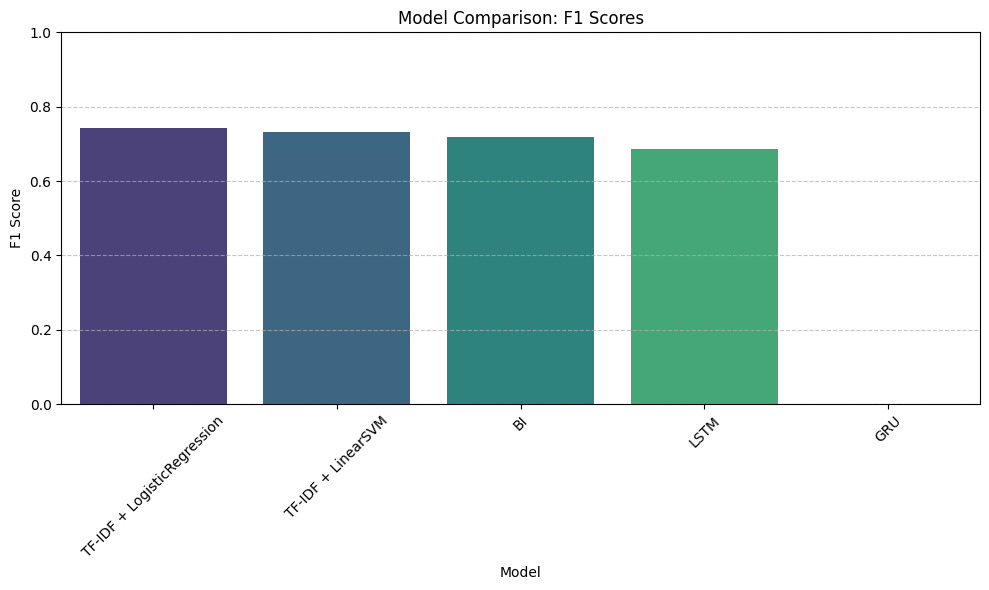

In [73]:
#Plot the Model's F1 score

plt.figure(figsize=(10, 6))
sns.barplot(data=res_df, x="Model", y="F1_Score", palette="viridis")
plt.title("Model Comparison: F1 Scores")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


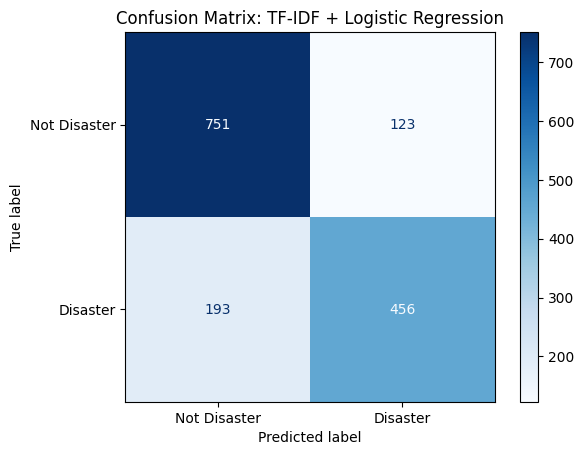

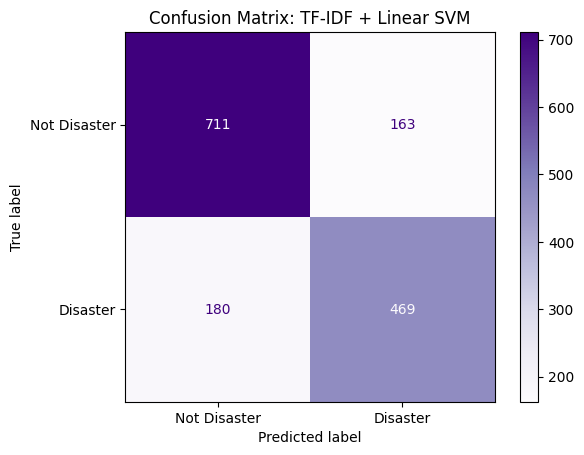

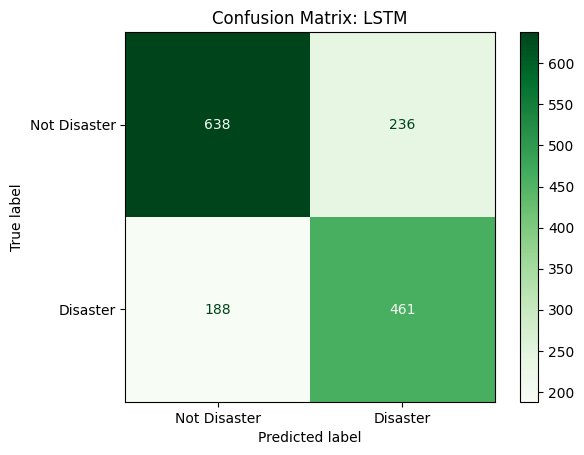

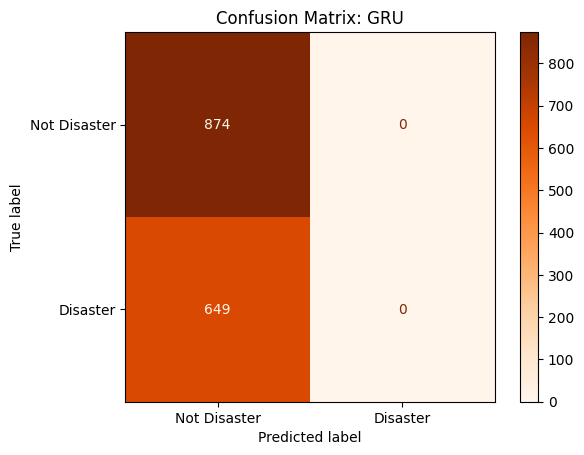

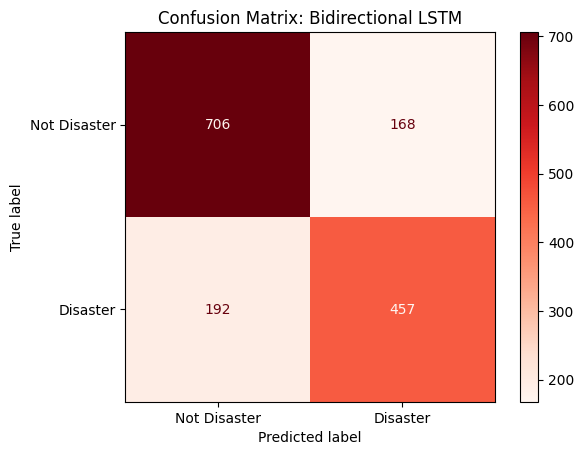

In [74]:
#Confusion Matrix for each model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_logreg = confusion_matrix(y_val, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=["Not Disaster", "Disaster"])
disp_logreg.plot(cmap="Blues")
plt.title("Confusion Matrix: TF-IDF + Logistic Regression")
plt.show()


cm_svm = confusion_matrix(y_val, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Not Disaster", "Disaster"])
disp_svm.plot(cmap="Purples")
plt.title("Confusion Matrix: TF-IDF + Linear SVM")
plt.show()

cm_lstm = confusion_matrix(y_val, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=["Not Disaster", "Disaster"])
disp_lstm.plot(cmap="Greens")
plt.title("Confusion Matrix: LSTM")
plt.show()

cm_gru = confusion_matrix(y_val, y_pred_gru)
disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru, display_labels=["Not Disaster", "Disaster"])
disp_gru.plot(cmap="Oranges")
plt.title("Confusion Matrix: GRU")
plt.show()

cm_bi = confusion_matrix(y_val, y_pred_bi)
disp_bi = ConfusionMatrixDisplay(confusion_matrix=cm_bi, display_labels=["Not Disaster", "Disaster"])
disp_bi.plot(cmap="Reds")
plt.title("Confusion Matrix: Bidirectional LSTM")
plt.show()


# 7.Submissions

In [ ]:
#Train the final model for submission

tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=2, max_features=100000)
X_train_full = tfidf.fit_transform(train_df['final_text'])

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_full, train_df['target'])

X_test = tfidf.transform(test_df['final_text'])

# Predict
test_preds = model.predict(X_test)

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_df['id'],
    'target': test_preds
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

# Score - 0.78240

# 8.Conclusion

We found that the best model suited for NLP disaster tweets is Logistic regression model with TF-IDF applied with F1 Score of 0.742.

Logistic regression is well suited for sparse data.TF-IDF captures keywords and phrases without needing deep context.

Advanced architecture like LSTM,GRU and Bidirectional LSTM is applied to the dataset and their F1 score is calculated.
They are powerful but require more data to generalize well.Can overfit easily onsmall datasets.(10k)

Among the 3, bidirectional LSTM performed well but validation loss started to increase and which clearly indicated overfitting.



# 9.References:

a)kaggle - Natural Language Processing with Disaster Tweets(Competition page and getting started notebook)

b)Keras documentation - https://keras.io/getting_started/

c)NLP getting started tutorial - https://www.kaggle.com/code/philculliton/nlp-getting-started-tutorial

d)Keras NLP starter Notebook - Disaster Tweets - https://www.kaggle.com/code/alexia/kerasnlp-starter-notebook-disaster-tweets